## Statystyczna analiza danych - ćwiczenia

### Projekt zaliczeniowy

Karol Augustowski 182743, grupa 3
IwB, magisterskie, niestacjonarne



### Import bibliotek używanych w projekcie


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### 1. Wstęp

Celem projektu jest ukazanie przypadku zastosowania eksploracyjnej analizy danych.
Dane użyte do niniejszej pracy pochodzą ze strony
[Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand).
Analizowany dataset dotyczy rezerwacji pobytu w dwóch hotelach (City Hotel i Resort Hotel).
Obserwacje zawierają między innymi
takie informacje jak długość pobytu, liczbę osób dorosłych, wyprzedzenie rezerwacji
(liczbę dni pomiędzy datą przyjazdu i datą rezerwacji), narodowość gości hotelowych, wybrany plan wyżywienia oraz status rezerwacji.

### 2. Przygotowanie danych

Pierwszym krokiem jest zaimportowanie danych z pliku csv. Dostępne dane zawierają 32 kolumny z danymi.

In [23]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

W celu ułatwienia analizy zdecydowano się na pominięcie kolumn zawierających mniej
interesujące dane w celu uproszczenia analizy. Dodatkowo dodano kolumnę zawierającą całkowitą długość pobytu,
wcześniej były wyróżnione liczby dni pobytu w weekendy oraz w czasie tygodnia pracującego. Liczbę dzieci oraz niemowląt występujące osobno zastąpiono pojedynczą kolumną zawierającą całkowitą liczbę dzieci (bez wyróżnania niemowląt).

In [24]:
los_column = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']
hotel_df['length_of_stay']=los_column
children_column= hotel_df['children']+hotel_df['babies']
hotel_df['children_total']=children_column
columns_to_drop = ['assigned_room_type', 'company', 'reserved_room_type', 'deposit_type',
                   'previous_bookings_not_canceled','previous_cancellations','agent',
                   'required_car_parking_spaces', 'total_of_special_requests', 'babies', 'children',
                   'days_in_waiting_list', 'deposit_type', 'reservation_status_date','booking_changes']
hotel_df=hotel_df.drop(columns_to_drop, axis=1)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_year          119390 non-null  int64  
 4   arrival_date_month         119390 non-null  object 
 5   arrival_date_week_number   119390 non-null  int64  
 6   arrival_date_day_of_month  119390 non-null  int64  
 7   stays_in_weekend_nights    119390 non-null  int64  
 8   stays_in_week_nights       119390 non-null  int64  
 9   adults                     119390 non-null  int64  
 10  meal                       119390 non-null  object 
 11  country                    118902 non-null  object 
 12  market_segment             119390 non-null  object 
 13  distribution_channel       11

Po pozbyciu się zbędnych kolumn (nie poddawanych analizie w niniejszym projekcie) sprawdzono brakujące wartości.

In [25]:
hotel_df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
meal                           0
country                      488
market_segment                 0
distribution_channel           0
is_repeated_guest              0
customer_type                  0
adr                            0
reservation_status             0
length_of_stay                 0
children_total                 4
dtype: int64

Brakujące dane uzupełniono poprzez wypełnienie zerami dla liczby dzieci dla rezerwacji. W przypadku kolumny zawierającej kod kraju, z jakiego byli goście brakujące wartości uzupełniano najczęściej występującą wartością.

In [26]:
hotel_df['children_total'] =  hotel_df['children_total'].fillna(0)
hotel_df['country'] = hotel_df['country'].fillna(hotel_df['country'].mode().index[0])

Po powyższych zabiegach zredukowano liczbę kolumn w wybranym zestawie danych z 32 do 19.


Poniżej przedstawiono wybrane przez autora zależności.

Histogram przedstawia liczbę rezerwacji przypadającą na rodzaj hotelu, dla którego dostępne były dane, "City Hotel" jest hotelem znajdującym się w mieście, natomiast "Resort Hotel" jest hotelem, który można określić mianem wakacyjnego/wypoczynkowego. Z dostępnych danych wynika, iż hotel miejski w analizowanym okresie miał około dwukrotnie większą liczbę rezerwacji. Warto zaznaczyć fakt, że ciężko na podstawie dostępnych danych wnioskować o obłożeniu hoteli z uwagi na brak informacji o całkowitej liczbie miejsc dla poszczególnych placówek. 

Text(0, 0.5, 'Liczba rezerwacji')

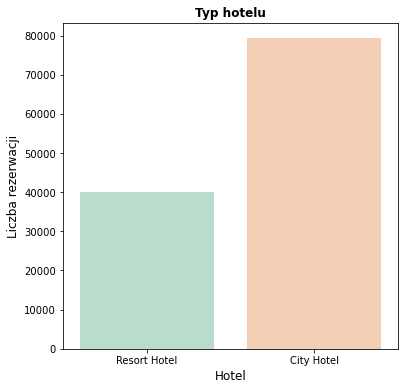

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='hotel', data = hotel_df, palette='Pastel2')
plt.title('Typ hotelu', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)

Kolejny histogram przedstawia liczbę anulowanych rezerwacji.

Text(0, 0.5, 'Liczba rezerwacji')

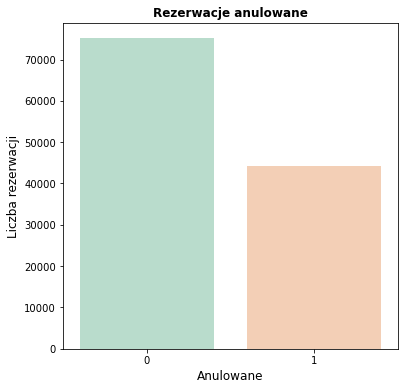

In [28]:
hotel_df['is_canceled'].unique()
plt.figure(figsize=(6,6))
cancelled=sns.countplot(x='is_canceled', data = hotel_df, palette='Pastel2')
plt.title('Rezerwacje anulowane', weight='bold')
plt.xlabel('Anulowane', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)

Następnym graficznym przedstawieniem analizowanego dataset'u jest wykres skrzypcowy przedstawiający rozkład wartości "lead time" (jest to czas wyrażony w liczbie dni pomiędzy datą wykonania rezerwacji i datą której dotyczy dana rezerwacja) dla poszczególnych lat oraz z zaznaczeniem typu hotelu. Analizując poniższy wykres można zauważyć dominującą liczbę rezerwacji ze stosunkowo małym lead time'm dla hotelu Resort. Fakt ten może być spowodowany klientami korzystającymi z ofert last minute.

Text(0, 0.5, 'Lead Time')

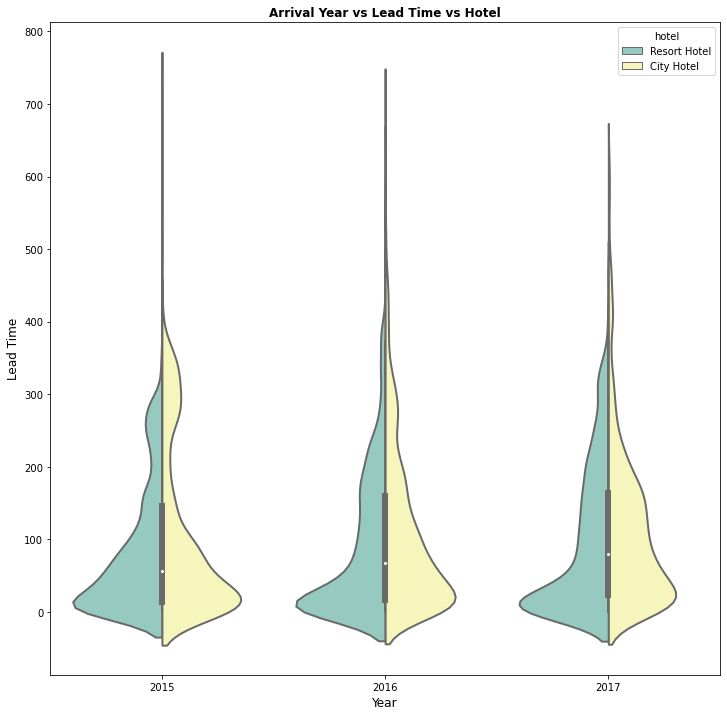

In [29]:
plt.figure(figsize=(12,12))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="hotel", data=hotel_df, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
plt.title('Arrival Year vs Lead Time vs Hotel', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

Na widocznych poniżej wykresach zaprezentowano liczbę rezerwacji dla poszczególnych miesięcy oraz lat z podziałem na typ hotelu.
Analizując wykres można zauważyć mniejsze zainteresowanie wynajmem pokoi w miesiącach zimowych oraz większe w miesiącach wakacyjnych.


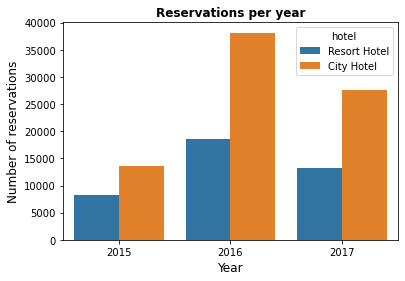

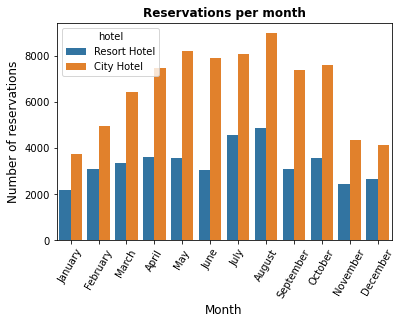

In [30]:
sns.countplot(data=hotel_df,
             x='arrival_date_year', hue='hotel')
plt.title('Reservations per year', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.show()

sns.countplot(data=hotel_df,
              x='arrival_date_month', hue='hotel',
              order=['January', 'February', 'March', 'April', 'May',
                     'June','July','August','September','October', 'November', 'December'])
plt.title('Reservations per month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of reservations', fontsize=12)
plt.xticks(rotation=60)
plt.show()

# sns.countplot(data=hotel_df,
#               x='adr', hue='hotel')
# plt.title('ADR', weight='bold')
# plt.xlabel('ADR', fontsize=12)
# plt.ylabel('Number of reservations', fontsize=12)
# plt.show()


Następny wykres ukazuje liczbę ponownych rezerwacji przez gości, którzy wcześniej korzystali z danych hoteli.
Dla obu hoteli liczba ta jest podobna, należy jednak pamiętać, iż w przypadku hotelu miejskiego liczba rezerwacji jest dwukrotnie większa, więc procentowo wartość jest stosunkowo niewielka.

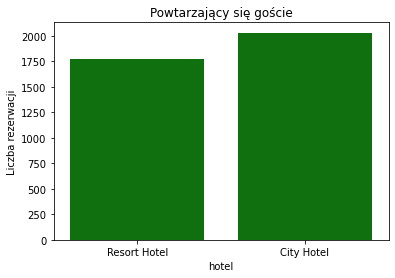

In [31]:

hotel_repeated = hotel_df[hotel_df['is_repeated_guest']==1]
sns.countplot(x="hotel", data=hotel_repeated, color='green')
plt.title("Powtarzający się goście")
plt.ylabel("Liczba rezerwacji")
plt.show()




Kolejny wykres przedstawia końcowy status rezerwacji (Check-out - gość się pojawił, Cancelled - rezerwacja została anulowana, No-Show - rezerwacja nie została anulowana lecz gość się nie pojawił)

Text(0, 0.5, 'Liczba rezerwacji')

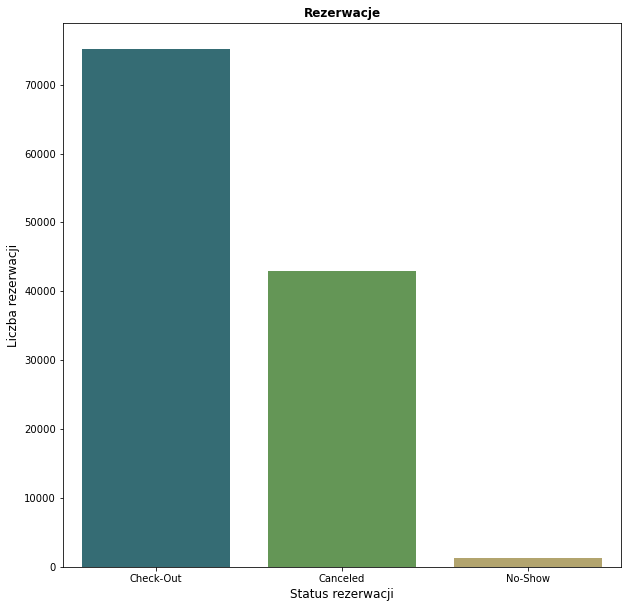

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x='reservation_status', data = hotel_df, palette='gist_earth')
plt.title('Rezerwacje', weight='bold')
plt.xlabel('Status rezerwacji', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)

Widoczny poniżej wykres przedstawia udział poszczególnych kanałów dystrybucji dla rezerwacji, aby uwidocznić na wykresie wszystkie występujące opcje zdecydowano się na zastosowanie skali logarytmicznej dla osi y.

Text(0, 0.5, 'Liczba rezerwacji')

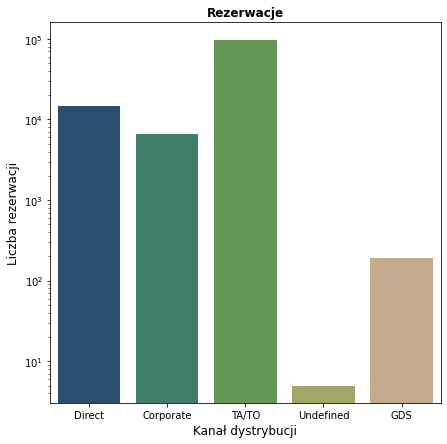

In [33]:
plt.figure(figsize=(7,7))
sns.countplot(x='distribution_channel', data = hotel_df, palette='gist_earth')
plt.title('Rezerwacje', weight='bold')
plt.xlabel('Kanał dystrybucji', fontsize=12)
plt.yscale('log')
plt.ylabel('Liczba rezerwacji', fontsize=12)

Kolejno stworzono wykres reprezentujący podział rezerwacji według segmentu rynkowego.

Text(0, 0.5, 'Liczba rezerwacji')

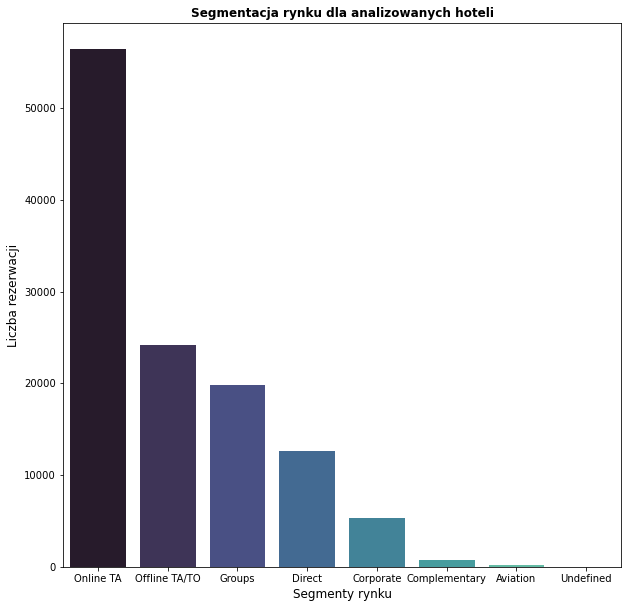

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(x=hotel_df['market_segment'], palette='mako', 
              order=pd.value_counts(hotel_df['market_segment']).index)
plt.title('Segmentacja rynku dla analizowanych hoteli', weight='bold')
plt.xlabel('Segmenty rynku', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)


Rozłożenie rezerwacji względem rodzaju klientów przedstawia poniższy wykres.

Text(0, 0.5, 'Liczba rezerwacji')

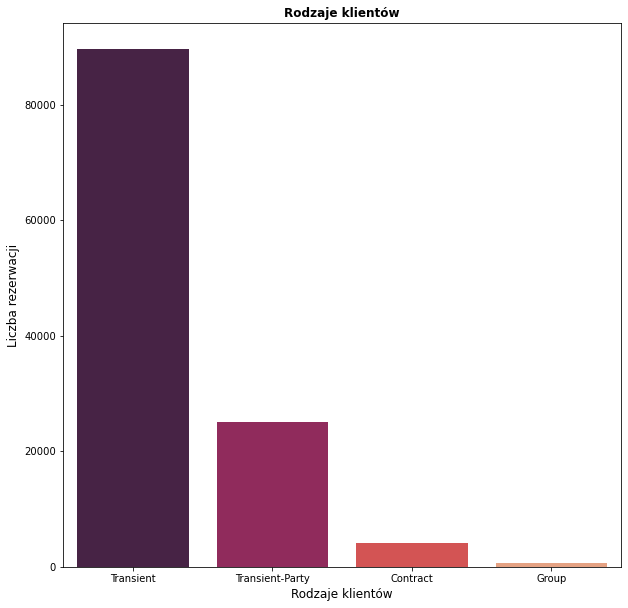

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(x=hotel_df['customer_type'], palette='rocket', 
              order=pd.value_counts(hotel_df['customer_type']).index)
plt.title('Rodzaje klientów', weight='bold')
plt.xlabel('Rodzaje klientów', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)

Dla ułatwienia dalszej analizy stworzono dodatkową kolumnę, zawierającą informacje o tym, czy rezerwacja uwzględniała dzieci czy nie.

In [36]:
with_children_column=hotel_df['children_total']>0

hotel_df['with_children']=with_children_column

Na wykresach poniżej przedstawiono procentowe liczby rezerwacji dla wybranych przedziałów długości pobytu dla hoteli.
Dwa poniższe wykresy przedstawiają dane uwzględniające wyłącznie rezerwacje dokonywane z dziećmi.

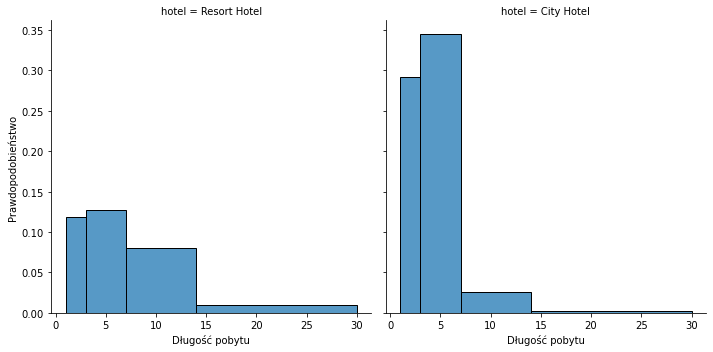

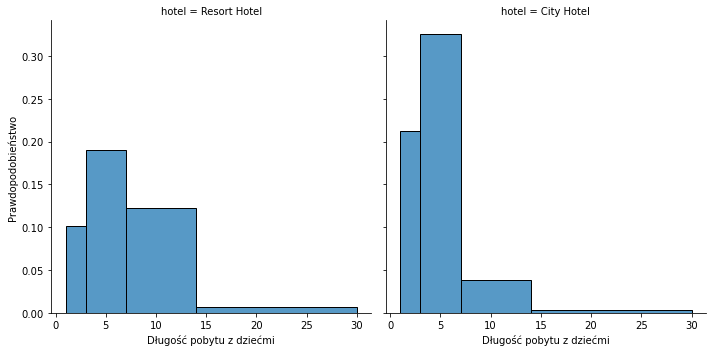

In [37]:
dist=sns.displot(hotel_df,
              x='length_of_stay', col='hotel', bins = [1,3,7,14,30], kind="hist", stat='probability')

dist.set_axis_labels("Długość pobytu", "Prawdopodobieństwo")
plt.show()


dist_children=sns.displot(hotel_df[hotel_df['with_children']==True],
              x='length_of_stay', col='hotel', bins = [1,3,7,14,30], kind="hist", stat='probability')

dist_children.set_axis_labels("Długość pobytu z dziećmi", "Prawdopodobieństwo")
plt.show()

Podstawowe statystyki opisowe danych liczbowych

In [38]:
hotel_numeric=hotel_df[['adr', 'children_total', 'adults', 'stays_in_week_nights', 'stays_in_weekend_nights', 'lead_time', 'length_of_stay']]
hotel_numeric.describe().round(2)

,adr,children_total,adults,stays_in_week_nights,stays_in_weekend_nights,lead_time,length_of_stay
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00
mean,101.83,0.11,1.86,2.50,0.93,104.01,3.43
std,50.54,0.41,0.58,1.91,1.00,106.86,2.56
min,-6.38,0.00,0.00,0.00,0.00,0.00,0.00
25%,69.29,0.00,2.00,1.00,0.00,18.00,2.00
50%,94.58,0.00,2.00,2.00,1.00,69.00,3.00
75%,126.00,0.00,2.00,3.00,2.00,160.00,4.00
max,5400.00,10.00,55.00,50.00,19.00,737.00,69.00


Text(0.5, 1.0, 'Macierz korelacji')

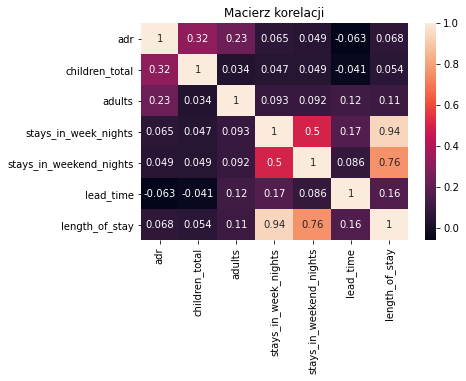

In [39]:
correlation = hotel_numeric.corr()
sns.heatmap(correlation, annot=True)
plt.title("Macierz korelacji")

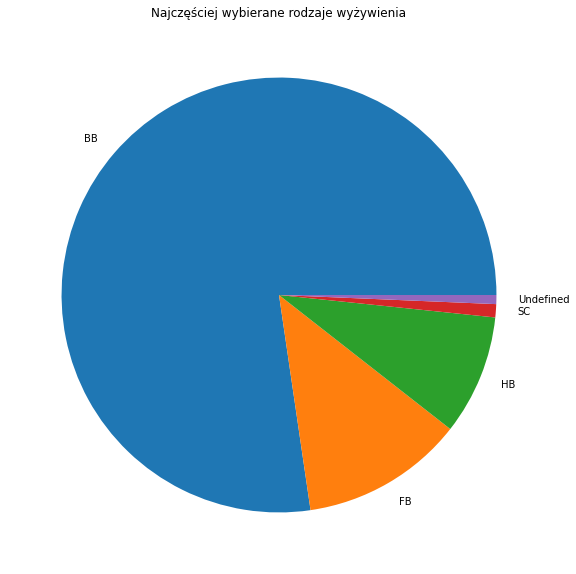

In [40]:
meal_types = hotel_df['meal'].unique()
size = hotel_df['meal'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(size, labels=meal_types)
plt.title("Najczęściej wybierane rodzaje wyżywienia")
plt.show()

In [41]:
group_meal_data = hotel_df.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)


meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.67,0.06,0.44,0.99,0.00
Resort Hotel,0.33,0.94,0.56,0.01,1.00


Text(0, 0.5, 'Liczba rezerwacji')

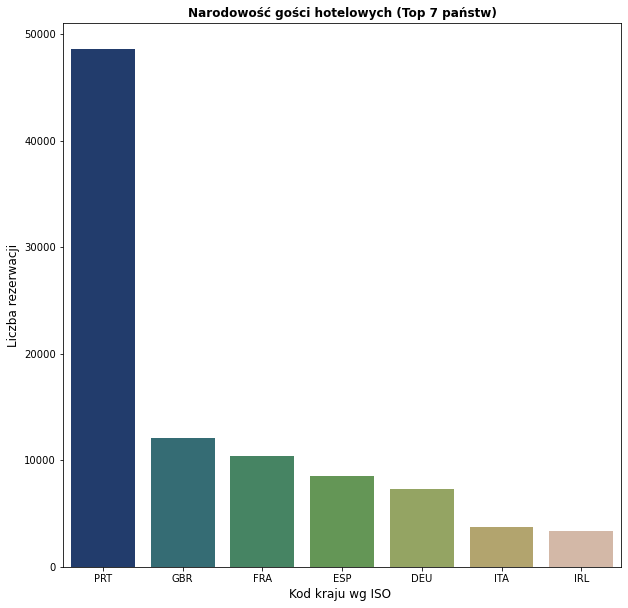

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotel_df,
              order=pd.value_counts(hotel_df['country']).iloc[:7].index, palette="gist_earth")
plt.title('Narodowość gości hotelowych (Top 7 państw)', weight='bold')
plt.xlabel('Kod kraju wg ISO ', fontsize=12)
plt.ylabel('Liczba rezerwacji', fontsize=12)

Analiza skupień na podstawie algorytmu K-means


In [43]:
hotel_adr_lt = hotel_df[['lead_time', 'adr']]

scaler = StandardScaler()
hotel_adr_lt_std=scaler.fit_transform(hotel_adr_lt)


In [44]:
hotel_adr_lt.describe()

,lead_time,adr
count,119390.000000,119390.000000
mean,104.011416,101.831122
std,106.863097,50.535790
min,0.000000,-6.380000
25%,18.000000,69.290000
50%,69.000000,94.575000
75%,160.000000,126.000000
max,737.000000,5400.000000


In [45]:
hotel_adr_lt_std.mean(axis=0).round(2)
hotel_adr_lt

,lead_time,adr
0,342,0.00
1,737,0.00
2,7,75.00
3,13,75.00
4,14,98.00
...,...,...
119385,23,96.14
119386,102,225.43
119387,34,157.71
119388,109,104.40


In [ ]:
clusters_range = range(1,15)
wss = []
for k in clusters_range:
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans=kmeans.fit(hotel_adr_lt)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
centers = pd.DataFrame({'Clusters': clusters_range, 'WSS' : wss})
centers

In [ ]:
plt.title("fdszfsdf")
sns.lineplot(x = 'Clusters', y = 'WSS', data = centers, marker="x")


In [ ]:
kmeans = KMeans(n_clusters=4 ,init="k-means++")

In [ ]:
kmeans = kmeans.fit(hotel_adr_lt[['lead_time','adr']])
kmeans.cluster_centers_

In [ ]:
hotel_df['Clusters'] = kmeans.labels_

In [ ]:
hotel_df['Clusters'].value_counts()

In [ ]:
sns.lmplot(x="lead_time", y="adr", hue='Clusters', data=hotel_df)
plt.ylim(0, 600)
plt.xlim(0, 800)
plt.show()